In [1]:
import numpy as np

In [2]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def sigmoid(self, a):
        return 1 / (1 + np.exp(-a))
    
    def softmax(self, a):
        c = np.max(a)
        exp_a = np.exp(a - c)
        return exp_a / np.sum(exp_a)
    
    def cross_entropy_error(self, y, t):
        delta = 1e-7
        return -np.sum(t * np.log(y + delta))
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1  = self.sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = self.softmax(a2)
        
        return y
    
    def loss(self, x, t):
        y = self.predict(x)
        
        return self.cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        return np.sum(y == t) / x.shape[0]
    
    def _numerical_gradient(self, f, x):
        h = 1e-4
        grads = np.zeros_like(x)
        
        ite = np.nditer(x, flags=['multi_index'])
        while not ite.finished:
            idx = ite.multi_index
            org_val = x[idx]
            
            x[idx] = org_val + h
            fxh1 = f(x)
            
            x[idx] = org_val - h
            fxh2 = f(x)
            
            grads[idx] = (fxh1 - fxh2) / (2 * h)
            
            x[idx] = org_val
            ite.iternext()
            
        return grads
    
    def numerical_gradient(self, x, t):
        f = lambda W: self.loss(x, t)
        
        grads = {}
        
        grads['W1'] = self._numerical_gradient(f, self.params['W1'])
        grads['b1'] = self._numerical_gradient(f, self.params['b1'])
        grads['W2'] = self._numerical_gradient(f, self.params['W2'])
        grads['b2'] = self._numerical_gradient(f, self.params['b2'])
        
        return grads

In [3]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [5]:
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)

grads = net.numerical_gradient(x, t)

print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [7]:
from dataset.mnist import load_mnist

In [8]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [9]:
train_loss_list = []

In [16]:
iters_num = 10
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [17]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    grad = network.numerical_gradient(x_batch, t_batch)
    
    for key in ('W1', 'W2', 'b1', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

In [18]:
print(train_loss_list)

[1125.5207987574986, 1004.350194925046, 760.77331618941037, 722.63996809447053, 696.77625393558242, 691.13520187452855, 690.33529565277354, 689.56295304764035, 683.51937684640711, 687.28576279701633, 687.66054478854835]


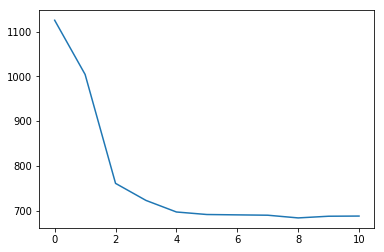

In [19]:
import matplotlib.pyplot as plt
plt.plot(train_loss_list)
plt.show()